In [49]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

In [50]:
data_path = 'data3.xlsx'
data = pd.read_excel(data_path)

In [51]:
# 定义预测器和目标变量
X = data[['贷款年利率']]
y_A = data['信誉评级A客户流失率']
y_B = data['信誉评级B客户流失率']
y_C = data['信誉评级C客户流失率']

In [52]:
models = {}
predictions = {}
scores = {}

In [53]:
for target, y in zip(['A', 'B', 'C'], [y_A, y_B, y_C]):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models[target] = model
    predictions[target] = y_pred
    scores[target] = {
        '均方根误差 (RMSE)': root_mean_squared_error(y_test, y_pred),
        '决定系数 (R²)': r2_score(y_test, y_pred)
    }

In [55]:
for target, score in scores.items():
    print(f"信誉评级 {target} 客户的模型:")
    print(f"  均方根误差 (RMSE): {score['均方根误差 (RMSE)']}")
    print(f"  决定系数 (R²): {score['决定系数 (R²)']}\n")

信誉评级 A 客户的模型:
  均方根误差 (RMSE): 0.07941755606369522
  决定系数 (R²): 0.7380831266786715

信誉评级 B 客户的模型:
  均方根误差 (RMSE): 0.07517689334388274
  决定系数 (R²): 0.7529669191628638

信誉评级 C 客户的模型:
  均方根误差 (RMSE): 0.07814908485955314
  决定系数 (R²): 0.7358140764356289



/tmp/ipykernel_19227/2087477304.py:27: UserWarning: Glyph 36151 (\N{CJK UNIFIED IDEOGRAPH-8D37}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_19227/2087477304.py:27: UserWarning: Glyph 27454 (\N{CJK UNIFIED IDEOGRAPH-6B3E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_19227/2087477304.py:27: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_19227/2087477304.py:27: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_19227/2087477304.py:27: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_19227/2087477304.py:27: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_19227/2087477304.py:27: UserWarning: Glyph 35465 (\N{CJK UNIFIED IDEOGRAPH-8A89}) missing from current font.
  plt.

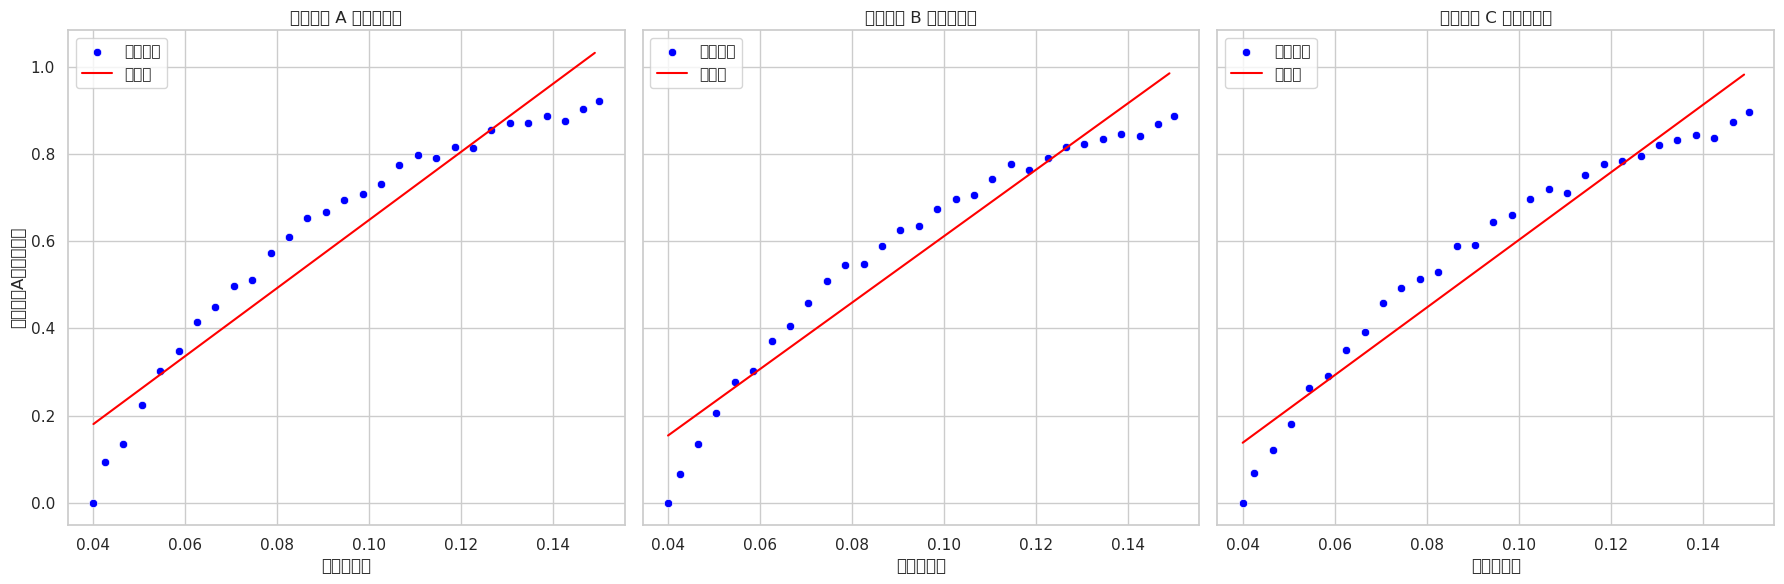

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 设置 matplotlib 配置参数，使用支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 'Microsoft YaHei' 也是常用的中文支持字体
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 绘图代码（之前的完整代码）
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
credit_ratings = ['A', 'B', 'C']
data_columns = ['信誉评级A客户流失率', '信誉评级B客户流失率', '信誉评级C客户流失率']

for ax, target, y, column in zip(axes, credit_ratings, [y_A, y_B, y_C], data_columns):
    sns.scatterplot(x=X['贷款年利率'], y=y, ax=ax, color='blue', label='实际数据')
    line_X = pd.DataFrame({'贷款年利率': [x / 1000.0 for x in range(int(min(X['贷款年利率']*1000)), int(max(X['贷款年利率']*1000)))]})
    line_y = models[target].predict(line_X)
    sns.lineplot(x=line_X['贷款年利率'], y=line_y, ax=ax, color='red', label='回归线')
    ax.set_title(f'信誉评级 {target} 客户流失率')
    ax.set_xlabel('贷款年利率')
    ax.set_ylabel(column)
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()